In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

#make pyplot text white
params = {"ytick.color" : "b",
          "xtick.color" : "b",
          "axes.labelcolor" : "b",
          "axes.edgecolor" : "b"}
plt.rcParams.update(params)

In [16]:
from GeneticAlgorithm import *

In [21]:
"""
Creates and shows a graph of all the highest fitnesses and when they first occured

@param TournamentPopulation population
@param integer runs - the number of generations that the genetic algorithm will be ran
"""
def makeBestPerformingGraph(population, runs):
    last_high = 0
    x = []
    y = []

    #Only marks the index at which a new best performing individual exists, this works because of free elitism
    for i in range(runs):
        population.run_cycle()
        if last_high != population.highest_fitness:
            x.append(i)
            y.append(population.highest_fitness)

            last_high = population.highest_fitness
    plt.title("Best performing per generation")
    plt.plot(x, y, 'bo')
    plt.show()
    

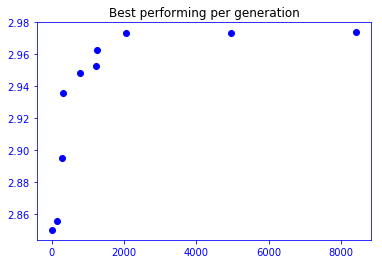

In [22]:
class NumberIndividual(AbstractLinkedListIndividual):
    def __init__(self, number_count=3):
        #Make genotype of n values between [0.0, 1.0)
        self.genotype = [random.random() for i in range(number_count)]
            
    def mutate(self, mutation_rate):
        for i in range(0, len(self.genotype)):
            if random.random() <= mutation_rate:
                self.genotype[i] = random.random()
        
    #Fitness is defined as the sum of all numbers this individual contains
    def fitness(self):
        return sum(self.genotype)

#Just a quick graph of that marks the best performing individual
makeBestPerformingGraph(TournamentPopulation(NumberIndividual, 100), 10000)

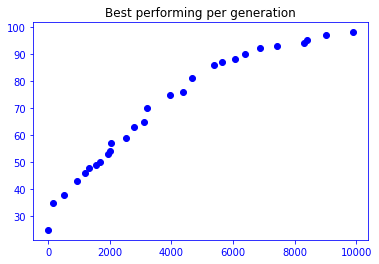

In [23]:
class HalfBitIndividual(AbstractLinkedListIndividual):
    def __init__(self, bit_count=250):
        self.genotype = [random.randint(0,1) for i in range(bit_count)]
        
    def mutate(self, mutation_rate):
        for i in range(0, len(self.genotype)):
            if random.random() <= mutation_rate:
                self.genotype[i] = random.randint(0,1)
                
    #Fitness is defined as the sum of the first half of the bits 
    #minus the sum of the second half of the bits
    def fitness(self):
        middle_index = int(len(self.genotype) / 2)
        
        first_half_sum = sum(self.genotype[0: middle_index])
        second_half_sum = sum(self.genotype[middle_index: -1])
        
        return first_half_sum - second_half_sum
    
#Just a quick graph of that marks the best performing individual
makeBestPerformingGraph(TournamentPopulation(HalfBitIndividual, 100), 10000)

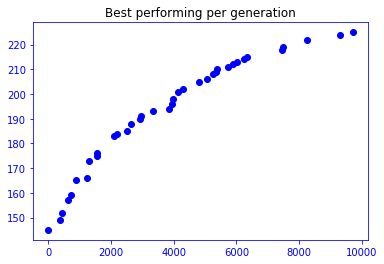

In [24]:
class FullBitIndividual(AbstractLinkedListIndividual):
    def __init__(self, bit_count=250):
        self.genotype = [random.randint(0,1) for i in range(bit_count)]
        
    def mutate(self, mutation_rate):
        for i in range(0, len(self.genotype)):
            if random.random() <= mutation_rate:
                self.genotype[i] = random.randint(0,1)
                
    #Sum of all genotype
    def fitness(self):
        return sum(self.genotype)

#Just a quick graph of that marks the best performing individual
makeBestPerformingGraph(TournamentPopulation(FullBitIndividual, 100), 10000)

In [ ]:

class BackPackIndividual(AbstractLinkedListIndividual):
    def __init__(self, max_weight=20):
        self.genotype = random.sample(items, 3)
    
    def mutate(self, mutation_rate):
        pass
    
    #fitness is defined as 
    def fitness(self):
        pass
    
#Just a quick graph of that marks the best performing individual
makeBestPerformingGraph(TournamentPopulation(MNIST, 100), 10000)